In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**(a) and (b)**

In [ ]:
data = pd.read_csv(r"/content/Auto.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data['horsepower'].value_counts()
data.shape

(397, 9)

**(c)**

In [ ]:
data.select_dtypes(include=["number"])
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


**(d)**

In [ ]:
data = data.select_dtypes(include=['number'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


**(e)**

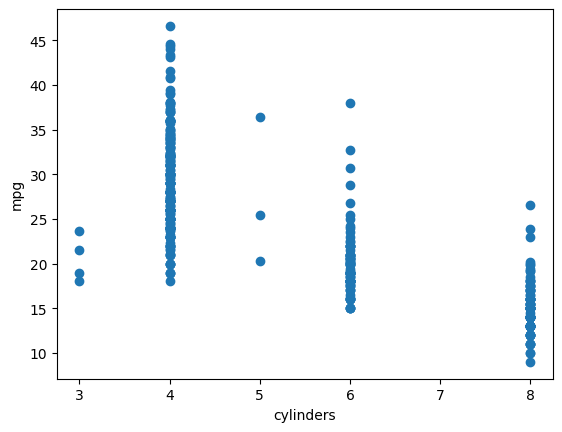

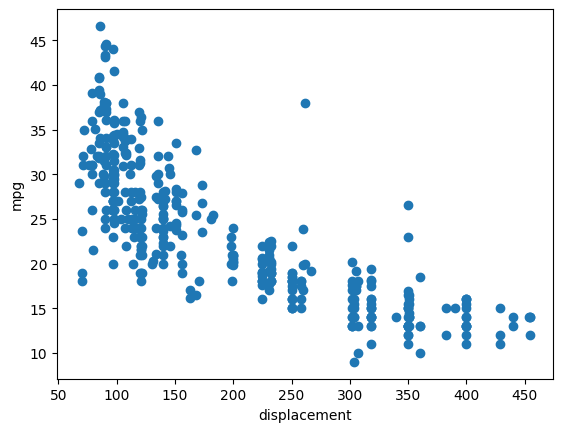

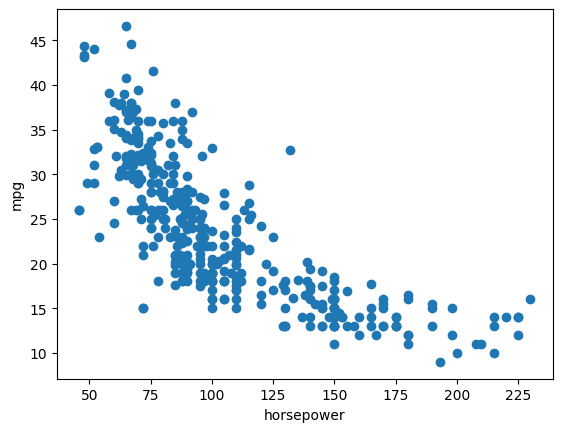

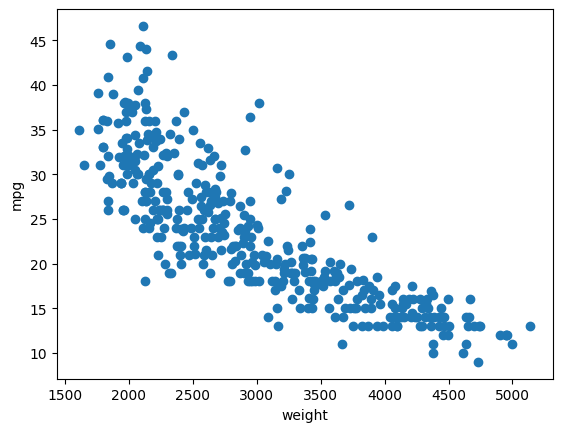

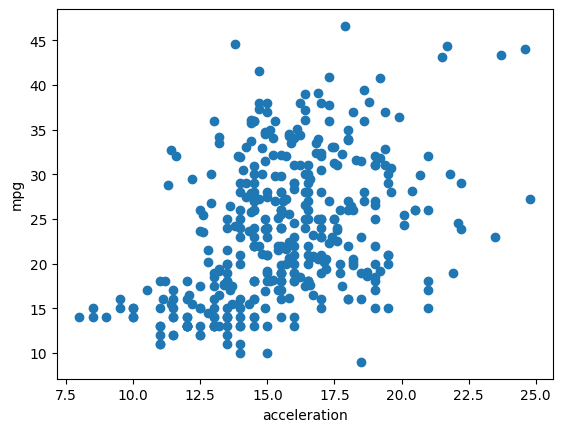

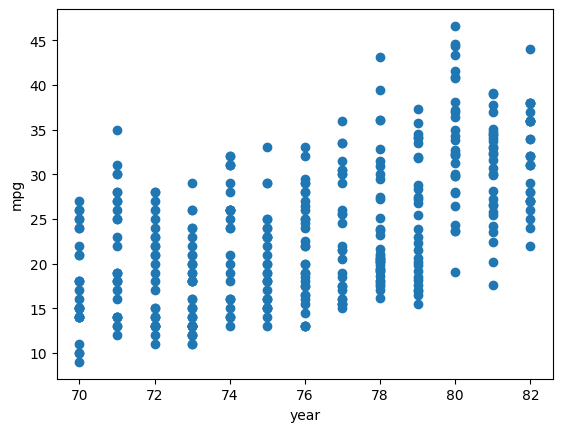

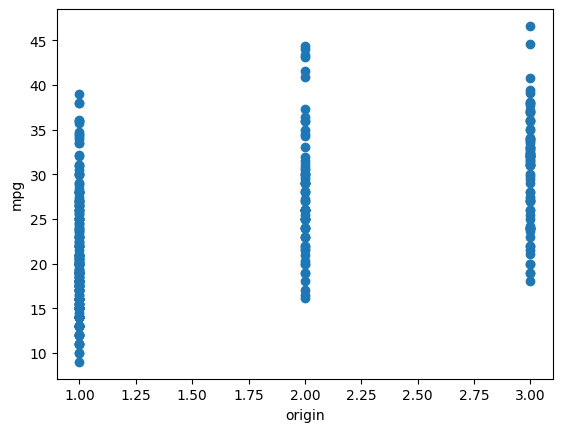

In [ ]:
temp = data.mpg
for i in list(data.columns):
  if i != 'mpg':
    plt.scatter(data[i], data['mpg'])
    plt.xlabel(i)
    plt.ylabel("mpg")
    plt.show()


In [ ]:
data.isna().sum()




mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

**(f)**

In [ ]:
data['horsepower'].replace(np.nan, data['horsepower'].mean())
missing_horsepower = data['horsepower'].isnull()
data.loc[missing_horsepower, 'horsepower'] = data['horsepower'].mean()
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

**(g)**

In [ ]:
from sklearn.model_selection import train_test_split
target = data['mpg']
data = data['horsepower']

Xtrain,Xtest,Ytrain,Ytest = train_test_split(data, target, train_size=0.7, test_size=0.3, random_state=42)

Xtrain = Xtrain.values.reshape(-1, 1)
Xtest = Xtest.values.reshape(-1,1)


**(h) and (i)**

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(Xtrain,Ytrain)

alpha = LR.intercept_
beta = LR.coef_[0]

predicted = LR.predict(Xtest)

print("Y = ", str(alpha)+"+"+str(beta)+"X")

Y =  40.21320139829456+-0.16244603257319173X


**(j)**

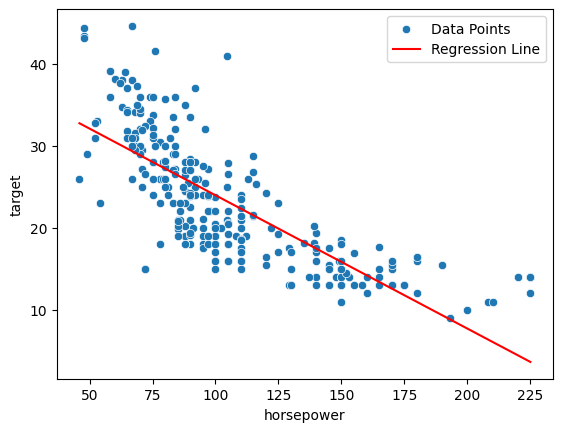

In [ ]:
import seaborn as sns

X_line = np.array([min(Xtrain), max(Xtrain)])
Y_line = alpha + beta * X_line

sns.scatterplot(x=Xtrain[:, 0], y=Ytrain, label='Data Points')
plt.plot(X_line, Y_line, color='red', label='Regression Line')

plt.annotate(f'Intercept (α): {alpha:.2f}', xy=(1.5, 3), fontsize=12, color='blue')

plt.xlabel('horsepower')
plt.ylabel('target')
plt.legend()

plt.show()




**(k)**

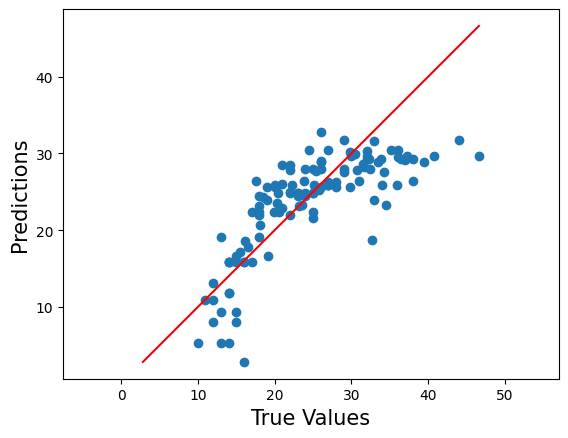

In [ ]:
plt.scatter(Ytest, predicted)
p1 = max(max(predicted), max(Ytest))
p2 = min(min(predicted), min(Ytest))
plt.plot([p1, p2], [p1, p2], color='red')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**(l)**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

MAE = mean_absolute_error(Ytest, predicted)
MSE = mean_squared_error(Ytest, predicted)
R2 = r2_score(Ytest, predicted)
RMSE = np.sqrt(MSE)


print("Mean absolute error: ", MAE)
print("Mean squared error: ", MSE)
print("R2: ", R2)
print("Root Mean squared error: ", MAE)

Mean absolute error:  4.015792898719496
Mean squared error:  27.36905275868511
R2:  0.5645445011127845
Root Mean squared error:  4.015792898719496


**(m)**

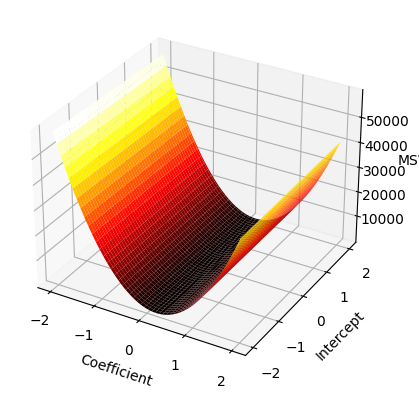

In [ ]:
coefficients = np.linspace(-2, 2, 100)
intercepts = np.linspace(-2, 2, 100)

mse_values_res = np.zeros((len(coefficients), len(intercepts)))

for i, coef in enumerate(coefficients):
    for j, intercept in enumerate(intercepts):
        model = LinearRegression()
        model.coef_ = np.array([coef])
        model.intercept_ = intercept
        Y_pred = model.predict(Xtest)
        mse = mean_squared_error(Ytest, Y_pred)
        mse_values_res[i, j] = mse

X_grid, Y_grid = np.meshgrid(coefficients, intercepts)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, mse_values_res.T, cmap='hot')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Intercept')
ax.set_zlabel('MSW')

plt.show()